# **Optimizers in Tensorflow Keras**

Optimizers are the expanded class, which includes the method to train your machine/deep learning model. Right optimizers are necessary for your model as they improve training speed and performance, Now there are many optimizers algorithms we have in PyTorch and TensorFlow library but today we will be discussing how to initiate TensorFlow Keras optimizers

## **Now how the loss functions and optimizers are related?**

During the training of the model, we tune the parameters(also known as hyperparameter tuning) and weights to minimize the loss and try to make our prediction accuracy as correct as possible. Now to change these parameters the optimizer’s role came in, which ties the model parameters with the loss function by updating the model in response to the loss function output. Simply optimizers shape the model into its most accurate form by playing with model weights. The loss function just tells the optimizer when it’s moving in the right or wrong direction.

TensorFlow mainly supports 9 optimizer classes, consisting of algorithms like Adadelta, FTRL, NAdam, Adadelta, and many more.

> * **Adadelta**: Optimizer that implements the Adadelta algorithm.
> * **Adagrad**: Optimizer that implements the Adagrad algorithm.
> * **Adam**: Optimizer that implements the Adam algorithm.
> * **Adamax**: Optimizer that implements the Adamax algorithm.
> * **Ftrl**: Optimizer that implements the FTRL algorithm.
> * **Nadam**: Optimizer that implements the NAdam algorithm.
> * **Optimizer class**: Base class for Keras optimizers.
> * **RMSprop**: Optimizer that implements the RMSprop algorithm.
> * **SGD**: Gradient descent (with momentum) optimizer.

You can refer this article [Optimizers in Tensorflow Keras](https://analyticsindiamag.com/guide-to-tensorflow-keras-optimizers/) for the theoretical aspect of Optimizers.

## **Initialize**

For initialization you can simply use google colab or for implementation in a local machine you can download anaconda that integrates all the major data science pages into one. Use below import command to initialize tensorflow:

In [ ]:
!python -m pip install pip --upgrade --user -q
!python -m pip install numpy pandas seaborn matplotlib scipy sklearn statsmodels keras tensorflow --user -q

In [ ]:
import IPython
IPython.Application.instance().kernel.do_shutdown(True)

In [ ]:
import tensorflow as tf

### **AdaGrad Optimizer**

Adagrad adapts the learning rate specifically with individual features: it means that some of the weights in your dataset have different learning rates than others. It always works best in a sparse dataset where a lot of inputs are missing. In TensorFlow, you can call the optimizer using the below command.

In [ ]:
tf.keras.optimizers.Adagrad(
    learning_rate=0.001,
    initial_accumulator_value=0.1,
    epsilon=1e-07,
    name="Adagrad",
    **kwargs
) 

It is a parameter specific learning rate, adapts with how frequently a parameter gets updated during training. Parameters we pass with these optimizers are learning_rate, initial_accumulator_value, epsilon, name, and **kwargs you can read more about them at [Keras documentation](https://keras.io/api/optimizers/adagrad/) or [TensorFlow docs](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adagrad). 

### **RMSprop Optimizer**

It is an exclusive version of Adagrad developed by Geoffrey Hinton( [learn more](http://www.cs.toronto.edu/~tijmen/csc321/slides/lecture_slides_lec6.pdf)), now the thinking behind this optimizer was pretty straight forward: instead of letting all of the gradients accumulate for momentum, it only accumulates gradients in a specific fix window. It is exactly like Adaprop(an updated version of Adagrad with some improvement), you can call this in the TensorFlow framework using the below command:

In [ ]:
tf.keras.optimizers.RMSprop(
    learning_rate=0.001,
rho=0.9, momentum=0.0, 
epsilon=1e-07, 
centered=False,
    name='RMSprop', **kwargs
) 

Learn more about RMSprop [here](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/RMSprop)

### **Adadelta(adaptive delta) Optimizer**

Now like the RMSprop optimizer, Adadelta(Read paper: [Zeiler, 2012](https://arxiv.org/abs/1212.5701)) is another more improved optimization algorithm, here delta refers to the difference between the current weight and the newly updated weight. Adadelta removed the use of the learning rate parameter completely and replaced it with an exponential moving average of squared deltas. You can call it in your machine learning project using the below command with basic parameters like epsilon, learning_rate, rho, and **kwargs.

In [ ]:
tf.keras.optimizers.Adadelta(
    learning_rate=0.001, rho=0.95, epsilon=1e-07, name='Adadelta',
    **kwargs
) 

### **Adam Optimizer**

Adam stands for adaptive moment estimation, which is another way of using past gradients to calculate current gradients, for the deep mathematical explanation you can read its official paper([Kingma & Ba, 2014](https://arxiv.org/abs/1412.6980)) here, Adam utilizes the concept of momentum by adding fractions of previous gradients to the current one, it is practically accepted in many projects during training neural nets.

You can call it using Tensorflow by leveraging the below commands into your project.

In [ ]:
tf.keras.optimizers.Adam(
    learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False,
    name='Adam', **kwargs
) 

Here is the standalone usage for the algorithm:

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.1)
var1 = tf.Variable(10.0)
loss = lambda: (var1 ** 2)/2.0       # d(loss)/d(var1) == var1
step_count = opt.minimize(loss, [var1]).numpy()
# The first step is `-learning_rate*sign(grad)`
var1.numpy() 

###**AdaMax Optimizer Class**

As the name suggests AdaMax is an adaption of Adam optimizer, by the same researchers who wrote the Adam algorithm, you can read about AdaMax([Kingma & Ba, 2015](https://arxiv.org/abs/1412.6980)) [here](https://arxiv.org/abs/1412.6980)

You can call it using below commands:

In [ ]:
tf.keras.optimizers.Adamax(
    learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07,
    name='Adamax', **kwargs
) 

It is a variant of Adam based on the infinity norm. Sometimes it is considered superior to Adam, especially in models with embeddings.

### **NAdam Optimizer**

NAdam optimizer is an acronym for Nesterov and Adam optimizer. Its official research paper was published in 2015 [here](http://cs229.stanford.edu/proj2015/054_report.pdf), now this Nesterov component is way more efficient than its previous implementations. Nadam used Nesterov to update the gradient. You can call NAdam optimizer class during training your model in Tensorflow by leveraging the below commands:

In [ ]:
tf.keras.optimizers.Nadam(
    learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07,
    name='Nadam', **kwargs
) 

###**Ftrl Optimizer**

According to algorithm 1 of the [research paper by google](https://static.googleusercontent.com/media/research.google.com/en//pubs/archive/41159.pdf), This version has support for both online L2 (the L2 penalty given in the paper above) and shrinkage-type L2 (which is the addition of an L2 penalty to the loss function).

In [ ]:
tf.keras.optimizers.Ftrl(
    learning_rate=0.001,
    learning_rate_power=-0.5,
    initial_accumulator_value=0.1,
    l1_regularization_strength=0.0,
    l2_regularization_strength=0.0,
    name="Ftrl",
    l2_shrinkage_regularization_strength=0.0,
    beta=0.0,
    **kwargs
) 

###**SGD Optimizer**

Stochastic gradient descent(SGD) optimization algorithm in contrast performs a parameter update for each training example as given below:

SGD performs redundant computations for bigger datasets, as it recomputes gradients for the same example before each parameter update. It performs frequent updates with a high variance that cause the objective function to fluctuate heavily as as shown in below image:

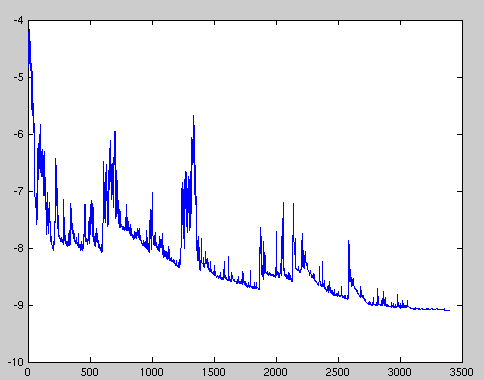

You can call the SGD optimizer using below commands:

In [ ]:
tf.keras.optimizers.SGD(
    learning_rate=0.01,
momentum=0.0,
nesterov=False, 
name="SGD", 
**kwargs
) 

Now for starter you can implement a standalone example like this to see the output:

In [ ]:
opt = tf.keras.optimizers.SGD(learning_rate=0.1)
var = tf.Variable(1.0)
loss = lambda: (var ** 2)/2.0         # d(loss)/d(var1) = var1
step_count = opt.minimize(loss, [var]).numpy()
## Step is `- learning_rate * grad` 
var.numpy() 

# **Related Articles --**

> * [Optimizers in Tensorflow Keras](https://analyticsindiamag.com/guide-to-tensorflow-keras-optimizers/)
> * [Loss functions in Tensorflow Keras](https://analyticsindiamag.com/ultimate-guide-to-loss-functions-in-tensorflow-keras-api-with-python-implementation/)
> * [Deep Learning Frameworks](https://analyticsindiamag.com/deep-learning-frameworks/)
> * [Types of Activation Functions](https://analyticsindiamag.com/most-common-activation-functions-in-neural-networks-and-rationale-behind-it/)
> * [Maths for Deep Learning](https://analyticsindiamag.com/beginners-guide-neural-network-math-python/)
> * [Deep Learning Using Tensorflow Keras](https://analyticsindiamag.com/deep-learning-using-tensorflow-keras/)